<a href="https://colab.research.google.com/github/sbolivara16/A-simple-tool-for-openbabel/blob/main/Openbabel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Introduction to Open Babel: Computational Chemistry Tool***

**Santiago Bolivar A, Qco, M.Sc, Ph.D (c) Conicet, National University of Rosario, Argentina**

Computational chemistry is a scientific discipline that uses computational methods and techniques to study and understand chemical phenomena. One essential tool in this field is Open Babel. Open Babel is an open-source library and toolkit designed to facilitate the manipulation and analysis of chemical structures in computational studies.

Open Babel provides a wide range of functionalities for converting, analyzing, and visualizing chemical data. With this tool, researchers can work with various chemical file formats, allowing them to read, write, and convert molecular structures between different formats.

One of the standout features of Open Babel is its ability to perform format conversions quickly and accurately. It can convert files to and from popular formats such as SMILES, InChI, PDB, SDF, and many others. This is invaluable for researchers as it enables them to utilize different programs and software that require specific formats.

In addition to format conversion, Open Babel offers a range of functionalities for the analysis and manipulation of chemical structures. Researchers can calculate molecular properties, generate 3D structures from 2D structures, perform geometry optimizations, remove hydrogens, neutralize molecules, and much more. These features allow scientists to efficiently prepare and process their chemical data before conducting more advanced computational studies.

The use of Open Babel in computational studies provides researchers with a flexible and powerful tool for working with chemical structures. By harnessing its conversion and manipulation capabilities, scientists can expedite their research, share and collaborate more effectively, and gain a deeper understanding of the chemical phenomena they are investigating.

In this Google Colab notebook, we will explore the use of Open Babel and how we can leverage its capabilities to conduct computational studies in the field of chemistry. We will learn how to read and write molecular structures, convert between different formats, calculate molecular properties, perform geometry optimizations, and much more. Let's start harnessing the potential of Open Babel in our computational chemistry studies!

In [16]:
#Install openbabel
!apt-get -qq install -y openbabel

In [17]:
#if you have any questions about using openbabel, or need to add any extra commands, run the following cell:
!obabel --help

Open Babel converts chemical structures from one file format to another

Usage: 
obabel[-i<input-type>] <infilename> [-o<output-type>] -O<outfilename> [Options]
The extension of a file decides the format, unless it is overridden
 by -i or -o options, e.g. -icml, or -o smi
See below for available format-types, which are the same as the 
file extensions and are case independent.
If no input or output file is given stdin or stdout are used instead.

More than one input file can be specified and their names can contain
wildcard chars (* and ?). The format of each file can be different unless
the -i option has been used, when they are all the same.
By default, the molecules are aggregated in the output file,
 but see -m option, Splitting, below.

Options, other than -i -o -O -m, must come after the input files.

Conversion options
-f <#> Start import at molecule # specified
-l <#> End import at molecule # specified
-e Continue with next object after error, if possible
-z Compress the output

**Suppose we have a smi (SMILE) file, or another file of our interest that contains one or more molecules that we wish to use in potential in silico calculations, and we wish to convert it to sdf, we can execute the following cell**

**Before executing the cell, if you do not know how to upload your file of interest to the environment, I leave you two guide images to do it:**

1. Click on the left side of the notebook, look for this icon shown here:
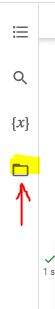

2. an area will be displayed, where you must click where I show you in the image and then select your file, you will notice that in a few seconds you will have the file of interest. 
In the example I show you that I have uploaded a file that I have called **moleculas.smi**

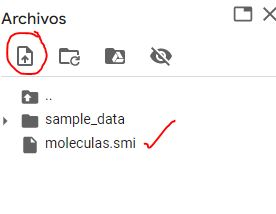


In [22]:
#Now let's run the code:
!obabel -i smi moleculas.smi -o sdf --gen3D > test.sdf


*** Open Babel Warning  in CorrectStereoAtoms
  Could not correct 2 stereocenter(s) in this molecule (2)
  with Atom Ids as follows: 9 14
*** Open Babel Warning  in CorrectStereoAtoms
  Could not correct 2 stereocenter(s) in this molecule (4)
  with Atom Ids as follows: 6 5
7 molecules converted


After having converted the file smile to sdf, it is important to minimize the geometry of our molecules of interest, **I have placed --steps 10000 --ff MMFF94 -p 7.4 --log -m; where steps 10000(you can modify it to more steps if you wish), --ff MMFF94 (use another force field, I recommend you to use this one, it is one of the most used), -p 7.4 (I have placed a neutral pH, but if you need a basic or acid pH, you can modify it to your interest).**

In [24]:

!obminimize test.sdf --minimize --sd --steps 10000 --ff MMFF94 -p 7.4 --log -m


A T O M   T Y P E S

IDX	TYPE	RING
1	2	NO
2	2	AL
3	3	AL
4	7	NO
5	6	AL
6	1	AL
7	1	AL
8	1	AL
9	1	AL
10	2	AL
11	1	NO
12	2	AL
13	3	AL
14	7	NO
15	2	AL
16	2	AL
17	1	NO
18	1	AL
19	5	NO
20	5	NO
21	5	NO
22	5	NO
23	5	NO
24	5	NO
25	5	NO
26	5	NO
27	5	NO
28	5	NO
29	5	NO
30	5	NO
31	5	NO
32	5	NO
33	5	NO
34	5	NO

F O R M A L   C H A R G E S

IDX	CHARGE
1	0.000000
2	0.000000
3	0.000000
4	0.000000
5	0.000000
6	0.000000
7	0.000000
8	0.000000
9	0.000000
10	0.000000
11	0.000000
12	0.000000
13	0.000000
14	0.000000
15	0.000000
16	0.000000
17	0.000000
18	0.000000
19	0.000000
20	0.000000
21	0.000000
22	0.000000
23	0.000000
24	0.000000
25	0.000000
26	0.000000
27	0.000000
28	0.000000
29	0.000000
30	0.000000
31	0.000000
32	0.000000
33	0.000000
34	0.000000

P A R T I A L   C H A R G E S

IDX	CHARGE
1	-0.300000
2	-0.123800
3	0.705600
4	-0.570000
5	-0.430000
6	0.280000
7	0.138200
8	0.000000
9	0.138200
10	-0.276400
11	0.138200
12	-0.123800
13	0.541200
14	-0.570000
15	-0.135600
16	-0.276400
17	0.138200
18	0.276400
19

And as a last step, we are going to separate each molecule present in the first file, in individual files, for this example I have decided to ask you to export them in sdf format; but if you need it in mol2, or in pdb, or in pdbqt you only have to modify that last aspect of the cell, for example:

**1. suppose I want to convert it in pdbqt (to do a molecular docking), the code would look like this: **

!obabel -isdf XXX.sdf -opdbqt -OName_.
pdbqt -m (copy and paste it in the cell and change xxx.sdf by the name of your file)

**2. Suppose I want to convert it to mol2, the code would look like this: **

!obabel -isdf XXX.sdf -omol2 -OName_.mol2 -m (copy and paste it in the cell and change xxx.sdf to your file name)

In [25]:
!obabel -isdf test.sdf -osdf -Oligand_.sdf -m

7 molecules converted
7 files output. The first is ligand_1.sdf


In [35]:
#Now let's download the converted molecules by executing the following command:
import shutil
import zipfile
import os

# Ruta del directorio de archivos
directory_path = "/content"

# Ruta del archivo ZIP de salida
zipfile_path = "/content/molecules.zip"

# Obtener la lista de archivos en el directorio
file_list = os.listdir(directory_path)

# Comprimir los archivos en un archivo ZIP
with zipfile.ZipFile(zipfile_path, "w") as zipf:
    for file_name in file_list:
        file_path = os.path.join(directory_path, file_name)
        zipf.write(file_path, file_name)

# Descargar el archivo ZIP
from google.colab import files
files.download(zipfile_path)




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Note that this is just a small sample of the versatility and usefulness of openbabel, this powerful software also features:

1. obminimize
2. obprobe
3. obenergy
4. obconformer
5. obfit
6. obgrep
7. obgen
8. obrotamer
9. obprop
10. obchiral
11. obchiraltop
12. obconvert
13. obdistgen
14. obdistmat
15. obenergy2
16. obfitrms
17. obgrepexpr
18. obhammerhead
19. obkurto
20. obmakematrix
21. obpartialcharge
22. obpointgroup
23. obrms
24. obrotax
25. obscreen
26. obsolvate
27. obsterimol
28. obtautomer
29. obtest
30. obthermo
31. obtorsion
32. obvolumetric
33. obvolmap

**For more information visit their website** [Openbabel](https://openbabel.org/wiki/Main_Page)





# **I hope you find this notebook useful, if you have any questions or suggestions please do not hesitate to contact me** [My github profile](https://github.com/sbolivara16) 📚💡🤝📬